In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
data=pd.read_csv('winners_f1.csv')

In [4]:
data

,date,continent,grand_prix,circuit,winner_name,team,time,laps,year
0,1950-05-13,Europe,Great Britain,Silverstone Circuit,Nino Farina,Alfa Romeo,02:13:23,70.0,1950
1,1950-05-21,Europe,Monaco,Circuit de Monaco,Juan Manuel Fangio,Alfa Romeo,03:13:18,100.0,1950
2,1950-05-30,North America,United States,Indianapolis Motor Speedway,Johnnie Parsons,Kurtis Kraft Offenhauser,02:46:55,138.0,1950
3,1950-06-04,Europe,Switzerland,Circuit Bremgarten,Nino Farina,Alfa Romeo,02:02:53,42.0,1950
4,1950-06-18,Europe,Belgium,Circuit de Spa Francorchamps,Juan Manuel Fangio,Alfa Romeo,02:47:26,35.0,1950
...,...,...,...,...,...,...,...,...,...
1137,2025-06-15,North America,Canada,Circuit Gilles Villeneuve,George Russell,Mercedes,01:31:52,70.0,2025
1138,2025-06-29,Europe,Austria,Red Bull Ring,Lando Norris,McLaren,01:23:47,70.0,2025
1139,2025-07-06,Europe,Great Britain,Silverstone Circuit,Lando Norris,McLaren,01:37:15,52.0,2025
1140,2025-07-27,Europe,Belgium,Circuit de Spa Francorchamps,Oscar Piastri,McLaren,01:25:22,44.0,2025


#A1. Data Types & Attributes task 2,3
date-ordinal.They have a natural order along a timeline
continent-nominal.They don not provide any quantitive value
grand prix-nominal. Also don not provide any quantitive value
circuit-nominal. Can not be used to compare with one another and don not provide any qunatitive value 
winner name-nominal. Also Can not be used to compare with one another and don not provide any qunatitive value
team-nominal. Also Can not be used to compare with one another and don not provide any qunatitive value
time-continuous. They are measurable
laps-discrete. Whole number and are countable
year-discrete. Countable and whole numbers

Mean value: 64.61733800350262
Median value: 64.0
Mode: 53.0
Range: 199.0
Variance: 402.60979553683694
Standard deviation: 20.065138811800853
Interquartile Range (IQR): 18.0
Suspected ouliers:
1       100.0
2       138.0
8       200.0
13       20.0
17      200.0
        ...  
248      14.0
263      14.0
276      14.0
518      14.0
1049      1.0
Name: laps, Length: 65, dtype: float64


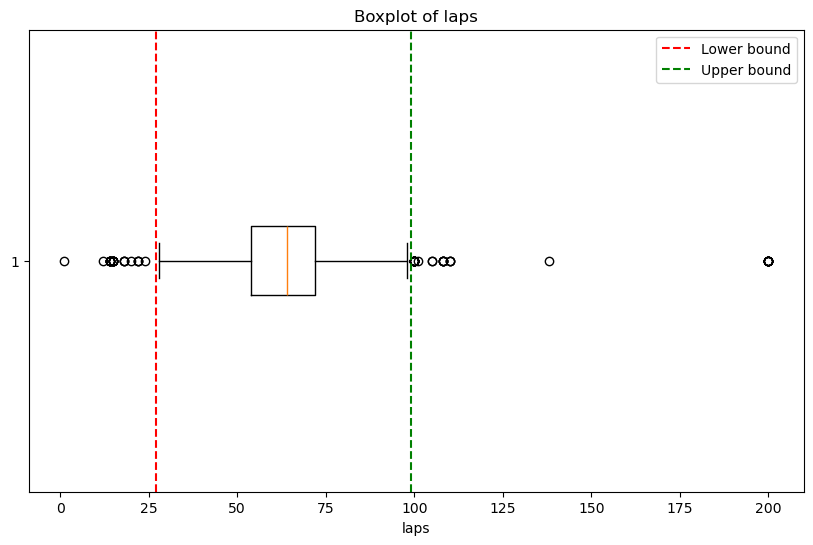

In [6]:
#A2. Descriptive Statistics 
mean_val=data['laps'].mean()
median_val=data['laps'].median()
mode_val=data['laps'].mode()
range_val=data['laps'].max()-data['laps'].min()
variance_val=data['laps'].var() #дисперсия
std_val=data['laps'].std()
Q1=data['laps'].quantile(0.25)
Q3=data['laps'].quantile(0.75)
IQR=Q3-Q1

print(f"Mean value: {mean_val}")
print(f"Median value: {median_val}")
print(f"Mode: {mode_val}")
print(f"Range: {range_val}")
print(f"Variance: {variance_val}")
print(f"Standard deviation: {std_val}")
print(f"Interquartile Range (IQR): {IQR}")

#Большая часть «нормальных» данных должна лежать в пределах этих границ
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=data['laps'][(data['laps']<lower_bound) | (data['laps']>upper_bound)]
print("Suspected ouliers:")
print(outliers)

plt.figure(figsize=(10,6))
plt.boxplot(data['laps'], vert=False)
plt.title(f"Boxplot of laps")
plt.xlabel('laps')

plt.axvline(lower_bound, color='red', linestyle='--', label='Lower bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='Upper bound')
plt.legend()
plt.show()

In [114]:
new_data=pd.read_csv('google_ads.csv')

In [116]:
new_data

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword
0,A1000,DataAnalyticsCourse,104.0,4498.0,$231.88,14.0,7.0,0.058,$1892,2024-11-16,hyderabad,desktop,learn data analytics
1,A1001,DataAnalyticsCourse,173.0,5107.0,$216.84,10.0,8.0,0.046,$1679,20-11-2024,hyderabad,mobile,data analytics course
2,A1002,Data Anlytics Corse,90.0,4544.0,$203.66,26.0,9.0,NaN,$1624,2024/11/16,hyderabad,Desktop,data analitics online
3,A1003,Data Analytcis Course,142.0,3185.0,$237.66,17.0,6.0,NaN,$1225,2024-11-26,HYDERABAD,tablet,data anaytics training
4,A1004,Data Analytics Corse,156.0,3361.0,$195.9,30.0,8.0,NaN,$1091,2024-11-22,hyderabad,desktop,online data analytic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,A3595,DataAnalyticsCourse,88.0,5344.0,$242.07,17.0,9.0,0.054,$1418,29-11-2024,HYDERABAD,MOBILE,online data analytic
2596,A3596,DataAnalyticsCourse,154.0,3211.0,$248.28,14.0,6.0,0.039,$1950,2024/11/28,hyderabad,TABLET,data analitics online
2597,A3597,Data Anlytics Corse,113.0,3808.0,$233.25,18.0,4.0,0.035,$1085,2024-11-02,Hyderbad,desktop,data anaytics training
2598,A3598,Data Analytics Corse,196.0,5853.0,$220.13,16.0,7.0,0.036,$1558,2024-11-08,hydrebad,Tablet,data anaytics training


In [9]:
new_data.isna().sum()

Ad_ID                0
Campaign_Name        0
Clicks             112
Impressions         54
Cost                97
Leads               48
Conversions         74
Conversion Rate    626
Sale_Amount        139
Ad_Date              0
Location             0
Device               0
Keyword              0
dtype: int64

In [10]:
# new_data['Sale_Amount'] = pd.to_numeric(new_data['Sale_Amount'], errors='coerce')


In [38]:
print(new_data['Impressions'].isna().sum())


54


In [54]:
#before
original_mean=new_data['Impressions'].mean()
original_std=new_data['Impressions'].std()
original_mean, original_std

(4523.280832678712, 869.9279125125391)

In [36]:
constant=new_data.copy()
constant['Impressions'] = constant['Impressions'].fillna(0)  # constant
after_constant_mean = constant['Impressions'].mean()
after_constant_std = constant['Impressions'].std()
after_constant_mean, after_constant_std

(4429.335769230769, 1075.790516337513)

In [40]:
meanValue=new_data.copy()
meanValue['Impressions'] = meanValue['Impressions'].fillna(meanValue['Impressions'].mean())
after_mean_mean = meanValue['Impressions'].mean()
after_mean_std = meanValue['Impressions'].std()

after_mean_mean, after_mean_std

(4523.280832678712, 860.8431330129187)

In [42]:
medianValue=new_data.copy()
medianValue['Impressions'] = medianValue['Impressions'].fillna(medianValue['Impressions'].median())
after_median_mean = medianValue['Impressions'].mean()
after_median_std = medianValue['Impressions'].std()
after_median_mean, after_median_std

(4523.181538461538, 860.843403113511)

In [46]:
modeValue=new_data.copy()
modeValue['Impressions'] = modeValue['Impressions'].fillna(modeValue['Impressions'].mode()[0])
after_mode_mean = modeValue['Impressions'].mode()[0]
after_mode_std = modeValue['Impressions'].std()
after_mode_mean, after_mode_std                                                       

(4653.0, 861.0419606126861)

In [68]:
predict = new_data.copy()
numeric_cols = predict.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_to_impute = [col for col in numeric_cols if predict[col].notna().sum() > 0]

imputer = KNNImputer(n_neighbors=5)
imputed_array = imputer.fit_transform(predict[numeric_cols_to_impute])
imputed_data = pd.DataFrame(imputed_array, columns=numeric_cols_to_impute)
predict[numeric_cols_to_impute] = imputed_data

after_predict_mean=predict['Impressions'].mean()
after_predict_std=predict['Impressions'].std()
after_predict_mean, after_predict_std

(4522.634769230769, 862.4792077316838)

In [72]:
#Show that all nulls are filled (example for KNN)
print("\nExample KNN-filled data (first 10 rows):")
print(predict['Impressions'].head(10))

#Show summary stats after imputation
print("\nSummary statistics after KNN imputation:")
print(predict['Impressions'].describe())


Example KNN-filled data (first 10 rows):
0    4498.0
1    5107.0
2    4544.0
3    3185.0
4    3361.0
5    3776.0
6    4480.0
7    5060.0
8    5434.0
9    3355.0
Name: Impressions, dtype: float64

Summary statistics after KNN imputation:
count    2600.000000
mean     4522.634769
std       862.479208
min      3000.000000
25%      3778.000000
50%      4517.500000
75%      5268.250000
max      5999.000000
Name: Impressions, dtype: float64


In [70]:
summary = pd.DataFrame({
    "Method": ["Original", "Constant=0", "Mean", "Median", "Predictive"],
    "Mean": [
        original_mean,
        after_constant_mean,
        after_mean_mean,
        after_median_mean,
        after_predict_mean
    ],
    "Std Dev": [
        original_std,
        after_constant_std,
        after_mean_std,
        after_median_std,
        after_predict_std
    ]
})

summary

,Method,Mean,Std Dev
0,Original,4523.280833,869.927913
1,Constant=0,4429.335769,1075.790516
2,Mean,4523.280833,860.843133
3,Median,4523.181538,860.843403
4,Predictive,4522.634769,862.479208


#pros
Very simple to apply and explain
Keeps dataset size intact (no row deletions)
#cons
Artificially introduces a value that may not represent reality                       
Not suitable for numerical data if the constant has no meaning
Riski for numbers

#pros mean/medium/mode
Easy and fast
Preserves general distribution center

#cons
Reduces variability

#pros
Produces more realistic imputations
Preserves variability better than simple mean/median
#cons
More complex and computationally expensive
Requires careful validation

In [148]:
# B1. Normalization & Standardization 
cols=['Clicks','Impressions']
data_selected=new_data[cols]


In [106]:
# for column in cols:
    # new_data[column] = pd.to_numeric(new_data[column], errors='coerce')

In [150]:
#min-max normalization
scaled=new_data.copy()
for column in cols:
   scaled[column]=(scaled[column]-scaled[column].min())/(scaled[column].max()-scaled[column].min())


In [152]:
z_scaled=new_data.copy()
for column in cols:
   z_scaled[column]=(z_scaled[column]-z_scaled[column].mean())/(z_scaled[column].std())

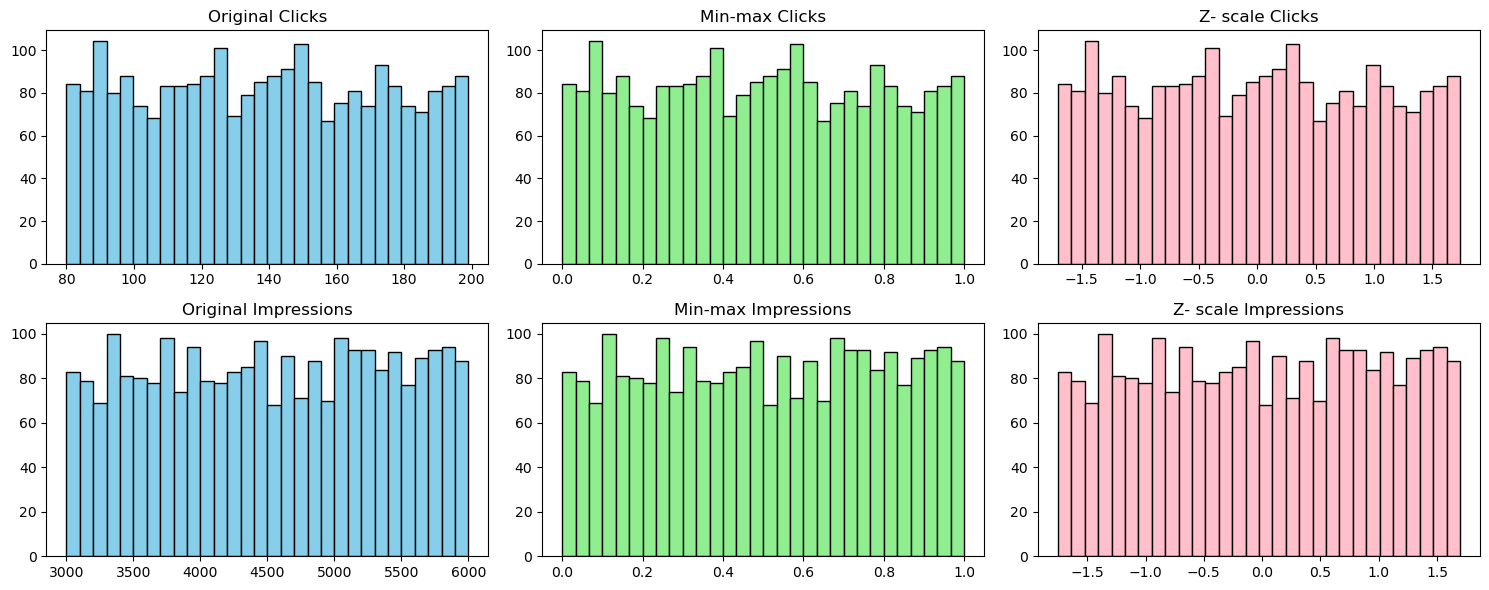

In [156]:
cols = ['Clicks', 'Impressions']

fig, axes = plt.subplots(len(cols), 3, figsize=(15, 6))

for i, col in enumerate(cols):
    # Before scaling (original data)
    axes[i, 0].hist(new_data[col].dropna(), bins=30, color="skyblue", edgecolor="black")
    axes[i, 0].set_title(f"Original {col}")

    # Min max
    axes[i, 1].hist(scaled[col].dropna(), bins=30, color="lightgreen", edgecolor="black")
    axes[i, 1].set_title(f"Min-max {col}")

    # z score
    axes[i, 2].hist(z_scaled[col].dropna(), bins=30, color="pink", edgecolor="black")
    axes[i, 2].set_title(f"Z- scale {col}")



plt.tight_layout()
plt.show()

In [120]:
# B2. Feature Creation & Discretization 
data2=pd.read_csv('Salary_Data.csv')

In [122]:
data2

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [124]:
feature_creation=data2['Salary']/data2['Years of Experience']
print(feature_creation)

0       18000.000000
1       21666.666667
2       10000.000000
3        8571.428571
4       10000.000000
            ...     
6699    10000.000000
6700    16666.666667
6701    13750.000000
6702    10000.000000
6703    35000.000000
Length: 6704, dtype: float64


In [126]:
bin_width=(data2['Salary'].max()-data2['Salary'].min())/4
print(bin_width)

62412.5


In [128]:
data2['Salary_equal_freq'] = pd.qcut(data2['Salary'], q=4, duplicates='drop')

print(data2['Salary_equal_freq'].value_counts())

Salary_equal_freq
(349.999, 70000.0]      1829
(115000.0, 160000.0]    1742
(160000.0, 250000.0]    1573
(70000.0, 115000.0]     1555
Name: count, dtype: int64


In [130]:
data2['High salary']=np.where(data2['Salary']>120000,1,0)

In [132]:
data2

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Salary_equal_freq,High salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,"(70000.0, 115000.0]",0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,"(349.999, 70000.0]",0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,"(115000.0, 160000.0]",1
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,"(349.999, 70000.0]",0
4,52.0,Male,Master's,Director,20.0,200000.0,"(160000.0, 250000.0]",1
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,"(160000.0, 250000.0]",1
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,"(349.999, 70000.0]",0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,"(349.999, 70000.0]",0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,"(115000.0, 160000.0]",1


In [ ]:

Feature creation-can improve model performance because it introduces more meaningful features
One-hot encoding lets models learn category-specific effects
Binarization-simplifies continuous features but may lose information
Equal-width-simple to implement,but can produce empty or unbalanced bins
Equal-frequency-Ensures balanced bin sizes, but the intervals may have very uneven widths

In [ ]:
#C1. Advanced Sampling & Data Quality Analysis 

In [134]:
data3=pd.read_csv('charts.csv')

In [136]:
data3

,date,country,position,streams,track_id,artists,artist_genres,duration,explicit,name
0,2021/04/15,de,82,625718,20IvMlpi4U5RuDnAlXSRiV,['Haftbefehl'],['german hip hop'],198746,False,Crackküche
1,2019/01/31,jp,171,50896,0V1K6MU0utODk4yNqZKsFv,['Suchmos'],"['japanese r&b', 'j-rock', 'japanese soul', 'j...",408320,False,WATER
2,2018/11/15,tr,59,185439,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
3,2018/11/22,tr,133,111159,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
4,2018/11/29,tr,166,96204,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
...,...,...,...,...,...,...,...,...,...,...
5428016,2019/11/28,se,163,165644,7731grGgxDd7aBNpGOjm9k,['Ebbot Lundberg'],['swedish alternative rock'],252798,False,När löven faller
5428017,2019/01/17,jp,161,49580,4Vm9XIi9AD1oK39xACmqk5,['THE ORAL CIGARETTES'],"['j-poprock', 'anime', 'j-rock', 'japanese ind...",257270,False,ワガママで誤魔化さないで
5428018,2019/01/24,jp,139,56826,4Vm9XIi9AD1oK39xACmqk5,['THE ORAL CIGARETTES'],"['j-poprock', 'anime', 'j-rock', 'japanese ind...",257270,False,ワガママで誤魔化さないで
5428019,2019/01/31,jp,151,53897,4Vm9XIi9AD1oK39xACmqk5,['THE ORAL CIGARETTES'],"['j-poprock', 'anime', 'j-rock', 'japanese ind...",257270,False,ワガママで誤魔化さないで


In [138]:
frac=0.10
seed=88
srs=data3.sample(frac=frac, random_state=seed)
print("SRS size:",len(srs))
print("SRS:",srs)

SRS size: 542802
SRS:                date country  position  streams                track_id  \
5119928  2014/12/07      hn         8     5196  34gCuhDGsG4bRPIf9bb02f   
1916630  2016/08/11      pe        53    45073  3hB5DgAiMAQ4DzYbsMq1IT   
2992645  2021/01/28      pt        16   123911  0WmSoWksyfhCME62WhkP2U   
2284192  2022/05/12      br        52  1661250  28m65cMH7QXHzFnZSTtNHY   
658430   2022/11/03      sg        40   125204  34ZAzO78a5DAVNrYIGWcPm   
...             ...     ...       ...      ...                     ...   
5161069  2016/11/10      us       169   912225  13HVjjWUZFaWilh2QUJKsP   
3124047  2019/04/25      lt        35    10352  4n7jnSxVLd8QioibtTDBDq   
4041634  2017/06/01      mx       162   282515  0afhq8XCExXpqazXczTSve   
1713902  2020/01/30      lu        84     4335  4iNPp0BZ4lBu7bipdWLcWk   
4832638  2018/09/27      id       167   116080  0IpMEZdKu7FB5KOpNEg8x3   

                                                 artists  \
5119928                      

In [140]:
strata_column='artists'
frac=0.10
seed=88
stratified = data3.groupby(strata_column, group_keys=False).apply(
    lambda x: x.sample(frac=frac, random_state=seed)
)

print("Stratified size:", len(stratified))
print(data3[strata_column].value_counts(normalize=True).head())
print(stratified[strata_column].value_counts(normalize=True).head())

Stratified size: 539253
artists
['Ed Sheeran']         0.014206
['The Weeknd']         0.009187
['Imagine Dragons']    0.008208
['Bad Bunny']          0.007564
['Billie Eilish']      0.006154
Name: proportion, dtype: float64
artists
['Ed Sheeran']         0.014299
['The Weeknd']         0.009248
['Imagine Dragons']    0.008261
['Bad Bunny']          0.007614
['Billie Eilish']      0.006194
Name: proportion, dtype: float64


/var/folders/zr/j74zlcxx5tscc29vs1y894bw0000gn/T/ipykernel_28018/1311864082.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified = data3.groupby(strata_column, group_keys=False).apply(


In [142]:
countries = data3["country"].dropna().unique()
selected_clusters = np.random.choice(countries, size=5, replace=False)  
cluster_sample = data3[data3["country"].isin(selected_clusters)]
print(selected_clusters)
print(cluster_sample)

['is' 'my' 'ad' 'bo' 'br']
               date country  position  streams                track_id  \
88       2014/08/24      br        46    66131  7GMeRGZax4uDKgz6wALWQw   
89       2014/08/31      br        40    77701  7GMeRGZax4uDKgz6wALWQw   
90       2014/09/07      br        24   110479  7GMeRGZax4uDKgz6wALWQw   
91       2014/09/14      br        27   104394  7GMeRGZax4uDKgz6wALWQw   
92       2014/09/21      br        29   104174  7GMeRGZax4uDKgz6wALWQw   
...             ...     ...       ...      ...                     ...   
5427989  2017/08/17      br       158   365903  41mt7YrfLrIc4EQJZFCJtw   
5427990  2017/08/24      br       167   351764  41mt7YrfLrIc4EQJZFCJtw   
5427991  2017/08/31      br       174   344412  41mt7YrfLrIc4EQJZFCJtw   
5427992  2017/09/07      br       188   332359  41mt7YrfLrIc4EQJZFCJtw   
5427993  2017/09/14      br       196   295293  41mt7YrfLrIc4EQJZFCJtw   

                        artists                           artist_genres  \
88       

In [144]:
columns=['position','streams']

def statistics(data3, columns):
    res={}
    for i in columns:
        s=data3[i].dropna()
        res[i]={
            'mean': s.mean(),
            'median':s.median(),
            'variance':s.var(ddof=1),
            'IQR':s.quantile(0.75)-s.quantile(0.25)
        }
    return pd.DataFrame(res).T

print("Full data stats")
print(statistics(data3, columns))

print("\nSRS stats")
print(statistics(srs, columns))

print("\nStratified stats")
print(statistics(stratified, columns))

print("\nCluster stats")
print(statistics(cluster_sample, columns))


Full data stats
                   mean   median      variance       IQR
position      98.232064     97.0  3.481493e+03     103.0
streams   310993.640561  45480.0  1.680457e+12  169556.0

SRS stats
                   mean   median      variance        IQR
position      98.353088     97.0  3.481810e+03     103.00
streams   310135.779596  45349.5  1.698274e+12  168367.75

Stratified stats
                   mean   median      variance       IQR
position      98.482110     97.0  3.480575e+03     103.0
streams   300361.313825  44936.0  1.512071e+12  166046.0

Cluster stats
                   mean   median      variance        IQR
position      97.819203     96.0  3.505997e+03     104.00
streams   252408.634298  28931.0  3.695621e+11  122257.25


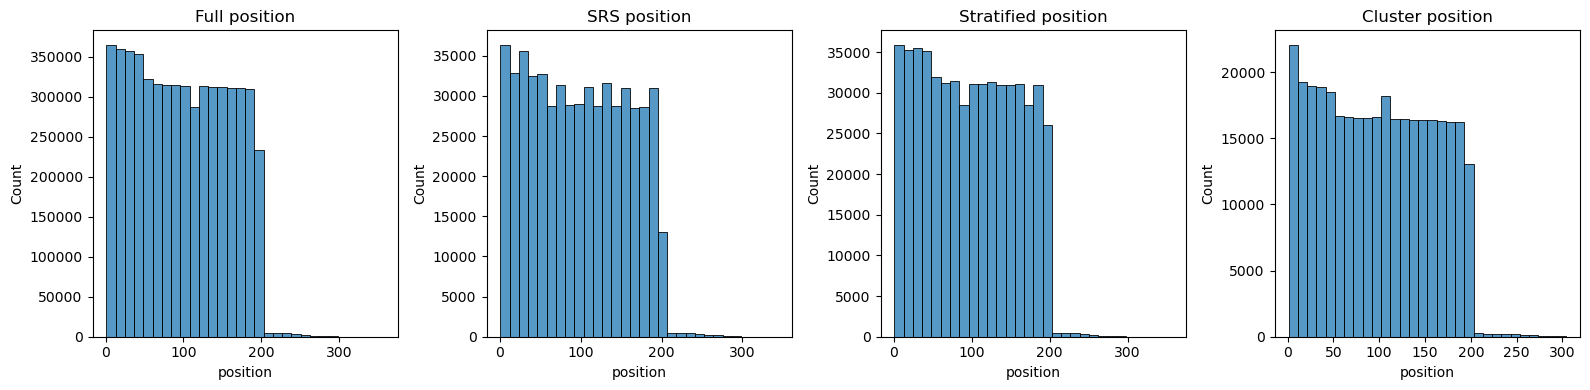

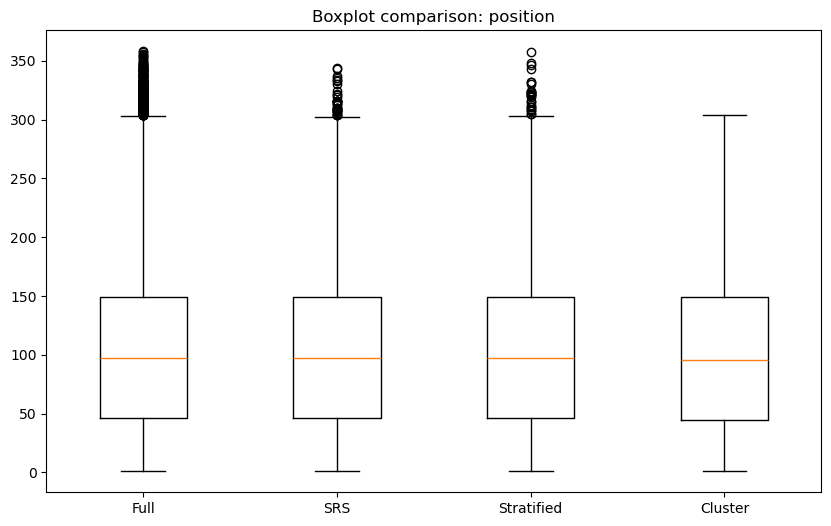

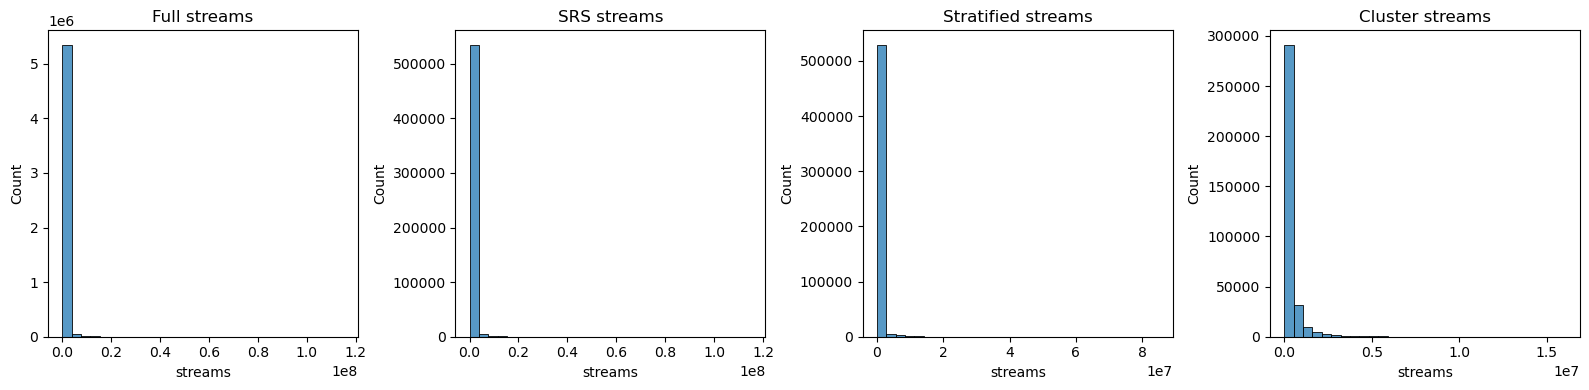

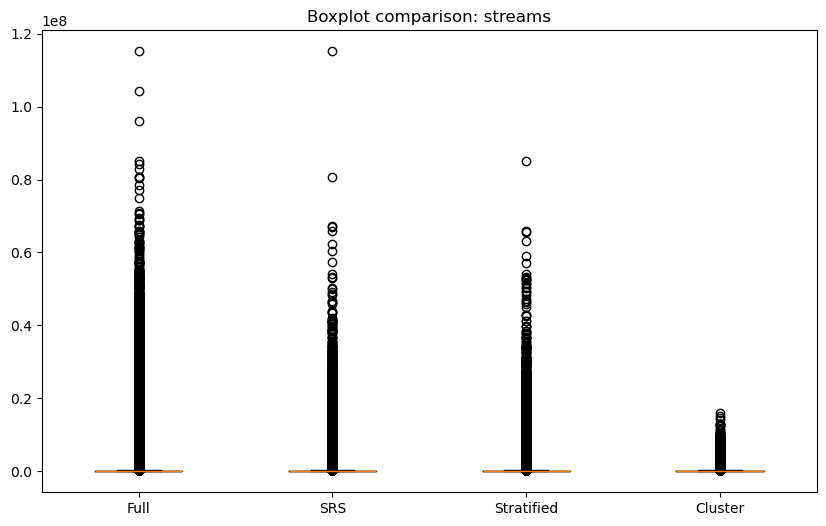

In [146]:
for col in columns:
    plt.figure(figsize=(16,4))

    plt.subplot(1,4,1)
    sns.histplot(data3[col].dropna(), bins=30, kde=False)
    plt.title(f'Full {col}')

    plt.subplot(1,4,2)
    sns.histplot(srs[col].dropna(), bins=30, kde=False)
    plt.title(f'SRS {col}')

    plt.subplot(1,4,3)
    sns.histplot(stratified[col].dropna(), bins=30, kde=False)
    plt.title(f'Stratified {col}')
    
    plt.subplot(1,4,4)
    sns.histplot(cluster_sample[col].dropna(), bins=30, kde=False)
    plt.title(f'Cluster {col}')

    plt.tight_layout()
    plt.show()

    # Boxplots (full vs samples)
    plt.figure(figsize=(10,6))
    plt.boxplot(
        [data3[col].dropna(), srs[col].dropna(), stratified[col].dropna(), cluster_sample[col].dropna()],
        labels=["Full", "SRS", "Stratified", "Cluster"]
    )
    plt.title(f"Boxplot comparison: {col}")
    plt.show()

In [ ]:
#Which sampling method best preserved the original distributions and why
As you can see from visualizations Stratified sampling best preserved the original. Since it works best when you have important
categories such as countries and artists. And distibution is close to original
#How sampling affected outlier detection and perceived data quality
Since SRS randomly selects data they keep some of outliers
Stratified keep ouliers since proportions across groups are maintained
In my case Cluster sample lost its outliers
#Recommendations for choosing a sampling method in a real data-mining project
Use stratified sampling if categorical proportions matter
Use SRS if you just need a quick smaller dataset
Use cluster sampling when data collection cost matters